In [37]:
from sklearn import preprocessing
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#plotting defaults
plt.rcParams['figure.figsize']=(15,8)
sns.set()
sns.set(font_scale=1.5)
#Display up to 80 columnd to keep everything visible

pd.set_option('display.max_columns',80)
pd.set_option('expand_frame_repr',True)
%matplotlib inline


In [26]:
X_train=np.array([[1,-1,2],[2,0,0],[0,1,-1]],dtype='float')

In [9]:
X_train

array([[ 1., -1.,  2.],
       [ 2.,  0.,  0.],
       [ 0.,  1., -1.]])

In [11]:
X_train.mean()

0.4444444444444444

In [17]:
np.mean(X_train,axis=0) #column

array([1.        , 0.        , 0.33333333])

In [16]:
np.mean(X_train,axis=1) #row

array([0.66666667, 0.66666667, 0.        ])

In [18]:
np.std(X_train)

1.0657403385139377

### after performing scale

In [19]:
X_scaled=preprocessing.scale(X_train)

In [20]:
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [21]:
np.mean(X_scaled)

4.9343245538895844e-17

In [22]:
np.mean(X_scaled,axis=0)

array([0., 0., 0.])

In [23]:
np.mean(X_scaled,axis=1)

array([ 0.03718711,  0.31916121, -0.35634832])

In [24]:
np.std(X_scaled,axis=0)

array([1., 1., 1.])

In [38]:
#Load data
df=pd.read_csv('/home/anilla/DataScience/kiva_loans.csv')

## Feature Pruning 

##### removing features that have zero variations


In [31]:
for col in df.columns:
    if df[col].unique().size==1:
        print(f'Dropping column:{format(col)}')
        df=df.drop(col,axis=1)

In [33]:
df.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


### Temporal Features

In [34]:
# pandas date to time practise
time_pd=pd.DataFrame({'year':[2017,2000],
                       'month':[2,5],
                       'day':[3,4]})

In [35]:
time_pd

,year,month,day
0,2017,2,3
1,2000,5,4


## .dt accessor

In [36]:
# posted date features

In [39]:
df.columns.tolist()

['id',
 'funded_amount',
 'loan_amount',
 'activity',
 'sector',
 'use',
 'country_code',
 'country',
 'region',
 'currency',
 'partner_id',
 'posted_time',
 'disbursed_time',
 'funded_time',
 'term_in_months',
 'lender_count',
 'tags',
 'borrower_genders',
 'repayment_interval',
 'date']

In [40]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [42]:
df['posted_year']=df['posted_time'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [44]:
df['posted_time'].describe()

count                        671205
unique                       667399
top       2017-05-15 00:00:00+00:00
freq                             25
Name: posted_time, dtype: object

In [56]:
df3 = pd.DataFrame(df.posted_time.str.split(' ',1).tolist(),
                                   columns = ['posted_date','posted_time'])

In [59]:
df.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [47]:
df

,posted_date,posted_time
0,2014-01-01,06:12:39+00:00
1,2014-01-01,06:51:08+00:00
2,2014-01-01,09:58:07+00:00
3,2014-01-01,08:03:11+00:00
4,2014-01-01,11:53:19+00:00
5,2014-01-01,10:06:19+00:00
6,2014-01-01,09:51:02+00:00
7,2014-01-01,11:46:01+00:00
8,2014-01-01,11:49:43+00:00
9,2014-01-01,05:41:03+00:00


In [48]:
df=pd.read_csv('/home/anilla/DataScience/kiva_loans.csv')

In [49]:
df2=df.copy()

In [50]:
df is df2

False

In [51]:
df.values is df2.values

False

In [52]:
df2.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [60]:
df.describe(include='O')

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


In [55]:
df2=str.split(' ',1).tolist(),columns ['posted_date','posted_time']

TypeError: must be str or None, not int

## One-hot encoding

### process of converting either categorical or string data into binary

In [67]:
trial_encode=pd.DataFrame({'A':['a','b','c'],'B':['b','a','c'],'C':['anilla',2,3]})

In [68]:
trial_encode

,A,B,C
0,a,b,anilla
1,b,a,2
2,c,c,3


In [69]:
pd.get_dummies(trial_encode)

,A_a,A_b,A_c,B_a,B_b,B_c,C_2,C_3,C_anilla
0,1,0,0,0,1,0,0,0,1
1,0,1,0,1,0,0,1,0,0
2,0,0,1,0,0,1,0,1,0


In [70]:
pd.get_dummies(df.sector).head()

,Agriculture,Arts,Clothing,Construction,Education,Entertainment,Food,Health,Housing,Manufacturing,Personal Use,Retail,Services,Transportation,Wholesale
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Extracting features from strings

In [71]:
df.get_dtype_counts()

float64     4
int64       2
object     14
dtype: int64

In [73]:
df.select_dtypes(include=[object])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,NaN,female,irregular,2014-01-01
1,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,NaN,"female, female",irregular,2014-01-01
2,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,"user_favorite, user_favorite",female,bullet,2014-01-01
3,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,NaN,female,irregular,2014-01-01
4,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,NaN,female,monthly,2014-01-01
5,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,NaN,female,irregular,2014-01-01
6,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,"user_favorite, user_favorite",female,bullet,2014-01-01
7,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,user_favorite,female,monthly,2014-01-01
9,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,NaN,female,irregular,2014-01-01


In [74]:
df['tags_length']=df.tags.str.len()

In [75]:
df


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,tags_length
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,NaN
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,NaN
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,28.0
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,NaN
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,NaN
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01,NaN
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01,28.0
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01,26.0
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01,13.0
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01,NaN


## Feature Scaling

most features scaling include:
1.Normalization
2.Standardizaton
3.Log_transformation

Normalization is the process of rescaling data from 0-1

X_std=(X-x.min(axis=0))/(x.max(axis=0))
X.min(axis=0)
X_scaled=X_std*(max-min) + min


In [91]:
min_max_scaler=preprocessing.MinMaxScaler()
normalized=min_max_scaler.fit_transform(df['loan_amount'].values.reshape(-1,1))[:,0]



In [92]:
normalized


array([0.00275069, 0.00550138, 0.00125031, ..., 0.        , 0.        ,
       0.        ])

In [84]:
x=pd.Series([1,2,3,4,5])
y=pd.DataFrame([1,2,3,4,5])

In [89]:
x
print(type(x))
x.shape

<class 'pandas.core.series.Series'>


(5,)

In [93]:
y
print(type(y))
y.shape

<class 'pandas.core.frame.DataFrame'>


(5, 1)

In [96]:
print("Pre Scaling\tMin: {0}\t\t Max: {1}\tMean: {2:3f}".format(df['loan_amount'].min(),df['loan_amount'].max(),df['loan_amount'].mean()))
print("Post Scaling\tMin: {0}\t Max: {1:.3f}\tMean: {2:3f}".format(np.min(normalized),np.max(normalized),np.mean(normalized)))

Pre Scaling	Min: 25.0		 Max: 100000.0	Mean: 842.397107
Post Scaling	Min: 0.0	 Max: 1.000	Mean: 0.008176


In [98]:
standardized=preprocessing.scale(df['loan_amount'])


In [99]:
standardized

array([-0.45250319, -0.22308018, -0.57764302, ..., -0.68192621,
       -0.68192621, -0.68192621])

In [100]:
print('Post Scaling\tMin:{0}\t\t Max:{1:3f}\tMean:{2:3f}'.format(np.min(standardized),np.max(standardized),np.mean(standardized)))

Post Scaling	Min:-0.6819262058455112		 Max:82.723767	Mean:-0.000000


## the data's distribution has been skewed

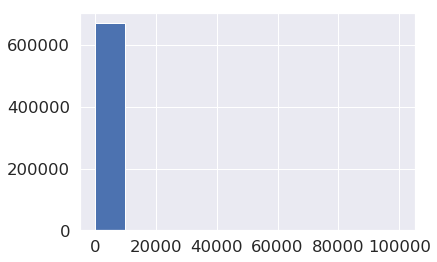

In [101]:
plt.hist(df['loan_amount'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

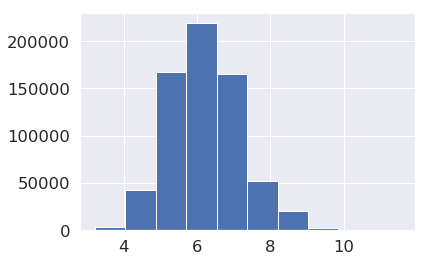

In [102]:
log_loan_amount=np.log(df['loan_amount'])
plt.hist(log_loan_amount)
plt.show

## Data  Imputation/Cleaning

In [103]:
df.get_dtype_counts()

float64     5
int64       2
object     14
dtype: int64

In [106]:
time_columns = df.select_dtypes(include=['datetime64','timedelta64']).columns
str_columns = df.select_dtypes(include=[object]).columns
numeric_columns = df.select_dtypes(exclude=[object,'datetime64','timedelta64']).columns

In [105]:
time_columns

Index([], dtype='object')